In [92]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import numpy as np

In [56]:
#1
df = pd.read_csv("Top100-2007.csv")

In [57]:
#2
print(df.shape)
rows = df.shape[0]
columns = df.shape[1]
print(f"Кількість записів : {rows}")
print(f"Кількість полів : {columns}")


(100, 8)
Кількість записів : 100
Кількість полів : 8


In [58]:
#3
K = 20
print(df.iloc[K-1:K-1+5])
print(df.tail(3*K+2))

    Rank                  Name     Country   Pts Singles Record (Career)  \
19    19      Jarkko Nieminen     Finland   1250                 235-172   
20    65        Florent Serra      France    565                   58-72   
21    21  Juan Carlos Ferrero       Spain   1230                 372-192   
22    23      Dmitry Tursunov      Russia   1120                 126-104   
23    29      Guillermo Canas   Argentina   1007                 243-174   

   Winning Percentage Career Earnings  \
19             57.74%        $3811532   
20             44.62%        $1256408   
21             65.96%       $11620750   
22             54.78%        $2592364   
23             58.27%        $5045583   

                                    Link to Wikipedia  
19      http://en.wikipedia.org/wiki/Jarkko_Nieminen   
20        http://en.wikipedia.org/wiki/Florent_Serra   
21  http://en.wikipedia.org/wiki/Juan_Carlos_Ferrero   
22      http://en.wikipedia.org/wiki/Dmitry_Tursunov   
23      http://e

In [59]:
#4
print("Поля")
for column in df.columns:
    print("Назва: ", column,"\nТип: ", df[column].dtype)


Поля
Назва:  Rank 
Тип:  int64
Назва:  Name 
Тип:  object
Назва:  Country 
Тип:  object
Назва:  Pts 
Тип:  int64
Назва:  Singles Record (Career) 
Тип:  object
Назва:  Winning Percentage 
Тип:  object
Назва:  Career Earnings 
Тип:  object
Назва:  Link to Wikipedia 
Тип:  object


In [60]:
#5
print("Було: ")
print(df.head(3))
for col in df.select_dtypes(include=["object", "string"]).columns:
    df[col] = df[col].str.strip().replace(r'\s+', ' ', regex=True)
print("Стало: ")
print(df.head(10))

Було: 
   Rank            Name       Country   Pts Singles Record (Career)  \
0     1  Roger Federer   Switzerland   7290                 594-143   
1     2   Rafael Nadal         Spain   4875                  309-73   
2     3   Andy Roddick           USA   2980                 436-136   

  Winning Percentage Career Earnings  \
0             80.60%       $41721169   
1             80.89%       $19470198   
2             76.22%       $14069938   

                             Link to Wikipedia  
0  http://en.wikipedia.org/wiki/Roger_Federer   
1   http://en.wikipedia.org/wiki/Rafael_Nadal   
2   http://en.wikipedia.org/wiki/Andy_Roddick   
Стало: 
   Rank               Name      Country   Pts Singles Record (Career)  \
0     1      Roger Federer  Switzerland  7290                 594-143   
1     2       Rafael Nadal        Spain  4875                  309-73   
2     3       Andy Roddick          USA  2980                 436-136   
3     4  Nikolay Davydenko       Russia  2825      

In [61]:
#6
def clean_numbers(s):
    cleaned = re.sub(r'[^0-9\-\+,\.]', '', str(s))
    return cleaned
# print("Було: ")
# print(df.head(3))

df["Winning Percentage"] = df["Winning Percentage"].apply(clean_numbers)
df["Career Earnings"] = df["Career Earnings"].apply(clean_numbers)
df[['Win', 'Lose']] = df['Singles Record (Career)'].str.split('-', n=1, expand=True)

for col in ["Winning Percentage",'Win', 'Lose',"Career Earnings","Pts","Rank"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
print("Стало: ")
print(df[["Winning Percentage",'Win', 'Lose',"Career Earnings","Pts","Rank"]].head(10))

Стало: 
   Winning Percentage    Win   Lose  Career Earnings   Pts  Rank
0               80.60  594.0  143.0       41721169.0  7290     1
1               80.89  309.0   73.0       19470198.0  4875     2
2               76.22  436.0  136.0       14069938.0  2980     3
3               60.00  303.0  202.0        8637353.0  2825     4
4               64.76  294.0  160.0        6742996.0  2755     5
5               62.26  320.0  194.0        6538755.0  2645     6
6               72.81  158.0   59.0        8035331.0  2540     7
7               60.39  340.0  223.0        7090571.0  2270     8
8               62.50  275.0  165.0        5848841.0  2150     9
9               65.00  416.0  224.0        8753953.0  2135    10


In [62]:
#7
print("Рядки з пропущеними даними:")
print(df[df.isnull().any(axis=1)])
df = df.dropna()
print("Кількість пропусків після очищення:")
print(df.isnull().sum())

Рядки з пропущеними даними:
    Rank              Name         Country  Pts Singles Record (Career)  \
84    85         Jan Hajek  Czech Republic  487                     NaN   
98    98  Alessio Di Mauro           Italy  441                     NaN   

    Winning Percentage  Career Earnings  \
84                 NaN              NaN   
98                 NaN              NaN   

                                    Link to Wikipedia  Win  Lose  
84  http://en.wikipedia.org/wiki/Jan_H%C3%A1jek_%2...  NaN   NaN  
98      http://en.wikipedia.org/wiki/Alessio_Di Mauro  NaN   NaN  
Кількість пропусків після очищення:
Rank                       0
Name                       0
Country                    0
Pts                        0
Singles Record (Career)    0
Winning Percentage         0
Career Earnings            0
Link to Wikipedia          0
Win                        0
Lose                       0
dtype: int64


In [63]:
#8
df["Total"] = df["Win"] + df["Lose"]
print(df[["Total","Win","Lose"]].head(5))


   Total    Win   Lose
0  737.0  594.0  143.0
1  382.0  309.0   73.0
2  572.0  436.0  136.0
3  505.0  303.0  202.0
4  454.0  294.0  160.0


In [64]:
#9
print("Було: ")
print(df.columns)
df.drop(['Singles Record (Career)', 'Link to Wikipedia'], axis=1,inplace=True)
print("Стало: ")
print(df.columns)



Було: 
Index(['Rank', 'Name', 'Country', 'Pts', 'Singles Record (Career)',
       'Winning Percentage', 'Career Earnings', 'Link to Wikipedia', 'Win',
       'Lose', 'Total'],
      dtype='object')
Стало: 
Index(['Rank', 'Name', 'Country', 'Pts', 'Winning Percentage',
       'Career Earnings', 'Win', 'Lose', 'Total'],
      dtype='object')


In [ ]:
#10
df = df[["Rank", "Name", "Country", "Pts", "Total", "Win", "Lose", "Winning Percentage"]]
print(df.head())


In [65]:
#11
#a
df_a = df.sort_values("Country")
df_a = df_a[df_a["Rank"] <= 100]
print("Відсортований за абеткою перелік країн, тенісисти з яких входять у Топ-100: ")
print(df_a["Country"])
#b
df_b = df.sort_values("Career Earnings")
print("Гравeць та кількість його очок із найменшою сумою призових: ")
print(df_b[["Name","Pts"]].head(1))
#c
df_c = df_a[df_a["Win"] == df_a["Lose"]]
print("Гравці та країни, яки вони представляють, кількість виграних матчів у яких дорівнює кількості програних: ")
print(df_c[["Name","Country"]])

Відсортований за абеткою перелік країн, тенісисти з яких входять у Топ-100: 
37    Argentina
23    Argentina
61    Argentina
92    Argentina
43    Argentina
        ...    
25          USA
47          USA
2           USA
96          USA
68          USA
Name: Country, Length: 98, dtype: object
Гравeць та кількість його очок із найменшою сумою призових: 
               Name  Pts
80  Diego Hartfield  491
Гравці та країни, яки вони представляють, кількість виграних матчів у яких дорівнює кількості програних: 
              Name      Country
48    Marc Gicquel       France
73      Luis Horna         Peru
49  Hyung-Taik Lee  South Korea


In [68]:
#12
#a
print("Кількість тенісистів з кожної країни у Топ-100: ")
df_a = df["Country"].value_counts()
print(df_a)
#b
df_b = df.groupby("Country", as_index=False)["Rank"].mean()


Кількість тенісистів з кожної країни у Топ-100: 
Country
Spain             13
France            11
Argentina         11
USA               10
Russia             7
Italy              5
Germany            4
Austria            4
Belgium            3
Sweden             3
Czech Republic     3
Australia          2
Thailand           2
Switzerland        2
UK                 2
Croatia            2
Serbia             2
Chile              2
Latvia             1
Ecuador            1
Denmark            1
Peru               1
Finland            1
Belarus            1
South Korea        1
Slovakia           1
Cyprus             1
Taipei             1
Name: count, dtype: int64


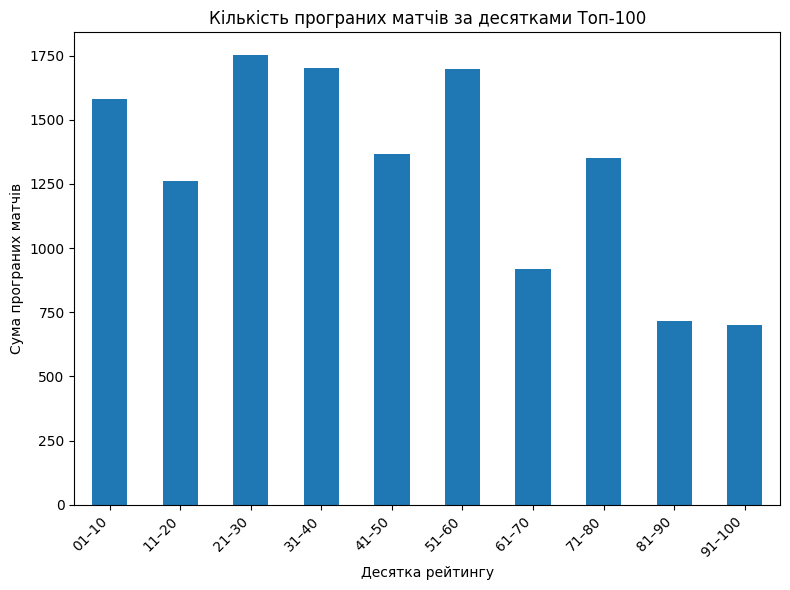

In [106]:

# 13


bins = list(range(0, 101, 10))
labels = [f"{i+1:02d}–{i+10:02d}" for i in range(0, 100, 10)]
df['ten'] = pd.cut(df['Rank'], bins=bins, labels=labels, include_lowest=True)
diagram = (df.groupby('ten', observed=True)['Lose']
          .sum()
          .reindex(labels))
fig, ax = plt.subplots(figsize=(8,6))   
ax = diagram.plot(kind='bar')
ax.set_title('Кількість програних матчів за десятками Топ-100')
ax.set_xlabel('Десятка рейтингу')
ax.set_ylabel('Сума програних матчів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

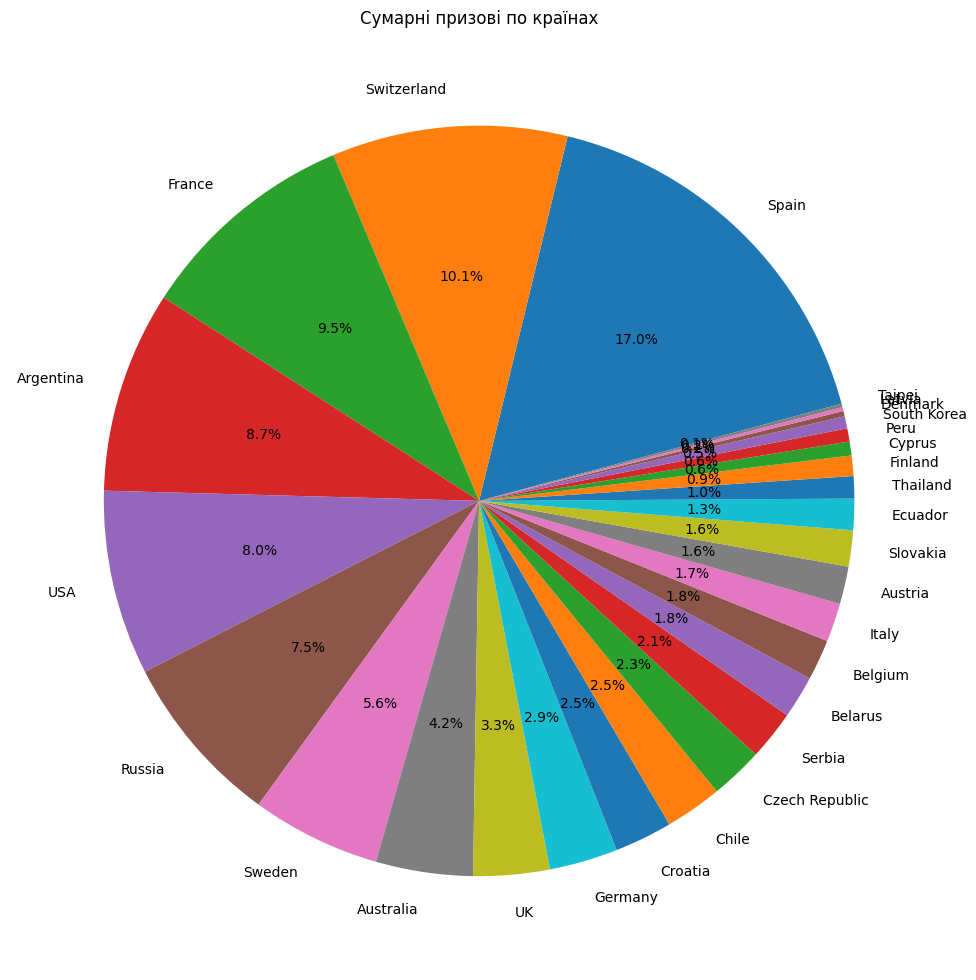

In [84]:
# 14
prizes = df.groupby('Country', observed=True)["Career Earnings"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(prizes, labels=prizes.index, autopct='%1.1f%%', startangle=15)
plt.title('Сумарні призові по країнах')
plt.tight_layout()
plt.show()


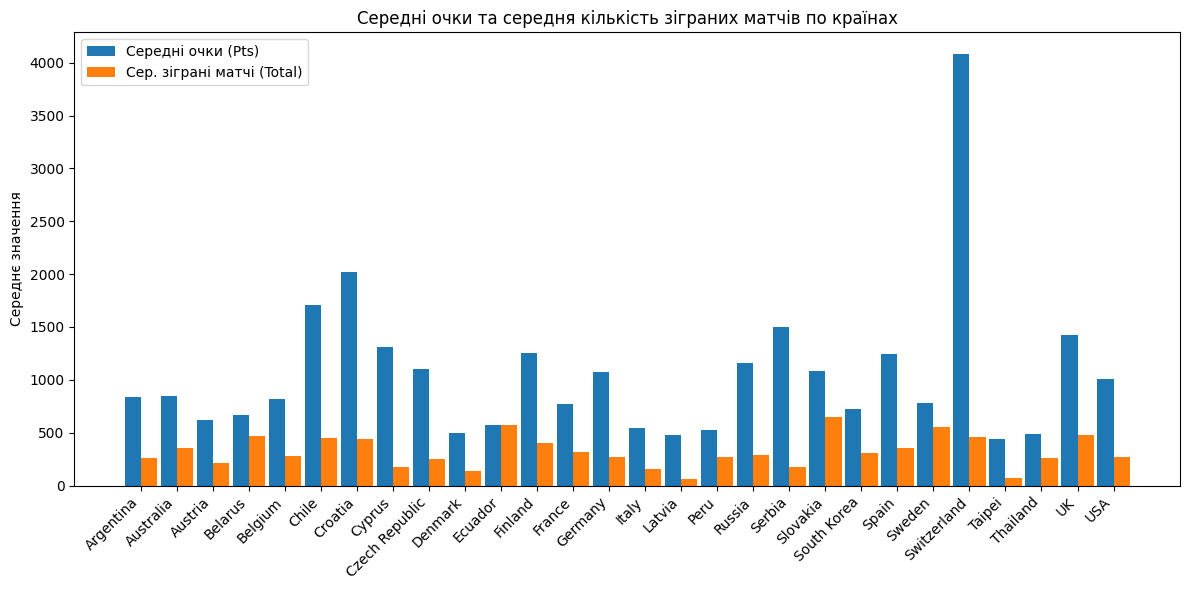

In [103]:
#15
avg = (df.groupby('Country', as_index=False)
         .agg(AvgPts=('Pts','mean'),
              AvgMatches=('Total','mean'))
         .sort_values('Country'))

x = np.arange(len(avg))
w = 0.45

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - w/2, avg['AvgPts'],   width=w, label='Середні очки (Pts)')
ax.bar(x + w/2, avg['AvgMatches'], width=w, label='Сер. зіграні матчі (Total)')

ax.set_xticks(x)
ax.set_xticklabels(avg['Country'], rotation=45, ha='right')
ax.set_ylabel('Середнє значення')
ax.set_title('Середні очки та середня кількість зіграних матчів по країнах')
ax.legend()
plt.tight_layout()
plt.show()